In [1]:
import pandas as pd
import polars as pl
import numpy as np
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

In [2]:
IDENTITY_INPUT_PATH = pathlib.Path("../data/train_identity.csv")
IDENTITY_OUTPUT_PATH = pathlib.Path("../data/train_identity_processed.parquet")
TRANSACTION_INPUT_PATH = pathlib.Path("../data/train_transaction.csv")
TRANSACTION_OUTPUT_PATH = pathlib.Path("../data/train_transaction_processed.parquet")

In [3]:
def show_correlation(correlation: pd.DataFrame, vmin: int = -1, vmax: int = 1) -> None:
    # Compute the correlation matrix
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 10))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(correlation, mask=mask, vmin=vmin, vmax=vmax, annot=False, cmap=cmap, ax=ax)
        
def show_correlation_with_target(correlation: pd.DataFrame, target_col: str) -> None:
    plt.figure(figsize=(20, 20))
    heatmap = sns.heatmap(correlation[[target_col]].sort_values(by=target_col, ascending=False).drop(index=target_col), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Features Correlating with Target', fontdict={'fontsize':18}, pad=10)

In [4]:
identities: pl.LazyFrame = pl.scan_csv(IDENTITY_INPUT_PATH)
identities.head().collect()

TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,str,str,str,str,str,f64,str,str,str,str,str,str,str,str
2987004,0.0,70787.0,null,null,null,null,null,null,null,null,100.0,"""NotFound""",null,-480.0,"""New""","""NotFound""",166.0,null,542.0,144.0,null,null,null,null,null,null,null,"""New""","""NotFound""","""Android 7.0""","""samsung browse…",32.0,"""2220x1080""","""match_status:2…","""T""","""F""","""T""","""T""","""mobile""","""SAMSUNG SM-G89…"
2987008,-5.0,98945.0,null,null,0.0,-5.0,null,null,null,null,100.0,"""NotFound""",49.0,-300.0,"""New""","""NotFound""",166.0,null,621.0,500.0,null,null,null,null,null,null,null,"""New""","""NotFound""","""iOS 11.1.2""","""mobile safari …",32.0,"""1334x750""","""match_status:1…","""T""","""F""","""F""","""T""","""mobile""","""iOS Device"""
2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,null,null,0.0,0.0,100.0,"""NotFound""",52.0,null,"""Found""","""Found""",121.0,null,410.0,142.0,null,null,null,null,null,null,null,"""Found""","""Found""",null,"""chrome 62.0""",null,null,null,"""F""","""F""","""T""","""T""","""desktop""","""Windows"""
2987011,-5.0,221832.0,null,null,0.0,-6.0,null,null,null,null,100.0,"""NotFound""",52.0,null,"""New""","""NotFound""",225.0,null,176.0,507.0,null,null,null,null,null,null,null,"""New""","""NotFound""",null,"""chrome 62.0""",null,null,null,"""F""","""F""","""T""","""T""","""desktop""",null
2987016,0.0,7460.0,0.0,0.0,1.0,0.0,null,null,0.0,0.0,100.0,"""NotFound""",null,-300.0,"""Found""","""Found""",166.0,15.0,529.0,575.0,null,null,null,null,null,null,null,"""Found""","""Found""","""Mac OS X 10_11…","""chrome 62.0""",24.0,"""1280x800""","""match_status:2…","""T""","""F""","""T""","""T""","""desktop""","""MacOS"""


In [5]:
sorted(identities.columns)

['DeviceInfo',
 'DeviceType',
 'TransactionID',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38']

In [6]:
transactions: pl.LazyFrame = pl.scan_csv(TRANSACTION_INPUT_PATH)
transactions.head().collect()

TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2987000,0,86400,68.5,"""W""",13926,null,150.0,"""discover""",142.0,"""credit""",315.0,87.0,19.0,null,null,null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,null,13.0,null,null,null,…,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987001,0,86401,29.0,"""W""",2755,404.0,150.0,"""mastercard""",102.0,"""credit""",325.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987002,0,86469,59.0,"""W""",4663,490.0,150.0,"""visa""",166.0,"""debit""",330.0,87.0,287.0,null,"""outlook.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987003,0,86499,50.0,"""W""",18132,567.0,150.0,"""mastercard""",117.0,"""debit""",476.0,87.0,null,null,"""yahoo.com""",null,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,null,…,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987004,0,86506,50.0,"""H""",4497,514.0,150.0,"""mastercard""",102.0,"""credit""",420.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,null,null,null,null,null,…,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Analyze Identities

In [7]:
list(zip(identities.columns, identities.dtypes))

[('TransactionID', Int64),
 ('id_01', Float64),
 ('id_02', Float64),
 ('id_03', Float64),
 ('id_04', Float64),
 ('id_05', Float64),
 ('id_06', Float64),
 ('id_07', Float64),
 ('id_08', Float64),
 ('id_09', Float64),
 ('id_10', Float64),
 ('id_11', Float64),
 ('id_12', String),
 ('id_13', Float64),
 ('id_14', Float64),
 ('id_15', String),
 ('id_16', String),
 ('id_17', Float64),
 ('id_18', Float64),
 ('id_19', Float64),
 ('id_20', Float64),
 ('id_21', Float64),
 ('id_22', Float64),
 ('id_23', String),
 ('id_24', Float64),
 ('id_25', Float64),
 ('id_26', Float64),
 ('id_27', String),
 ('id_28', String),
 ('id_29', String),
 ('id_30', String),
 ('id_31', String),
 ('id_32', Float64),
 ('id_33', String),
 ('id_34', String),
 ('id_35', String),
 ('id_36', String),
 ('id_37', String),
 ('id_38', String),
 ('DeviceType', String),
 ('DeviceInfo', String)]

In [8]:
identities_correlation: pd.DataFrame = identities.select(pl.col(pl.NUMERIC_DTYPES)).drop("TransactionID").collect().to_pandas().corr()

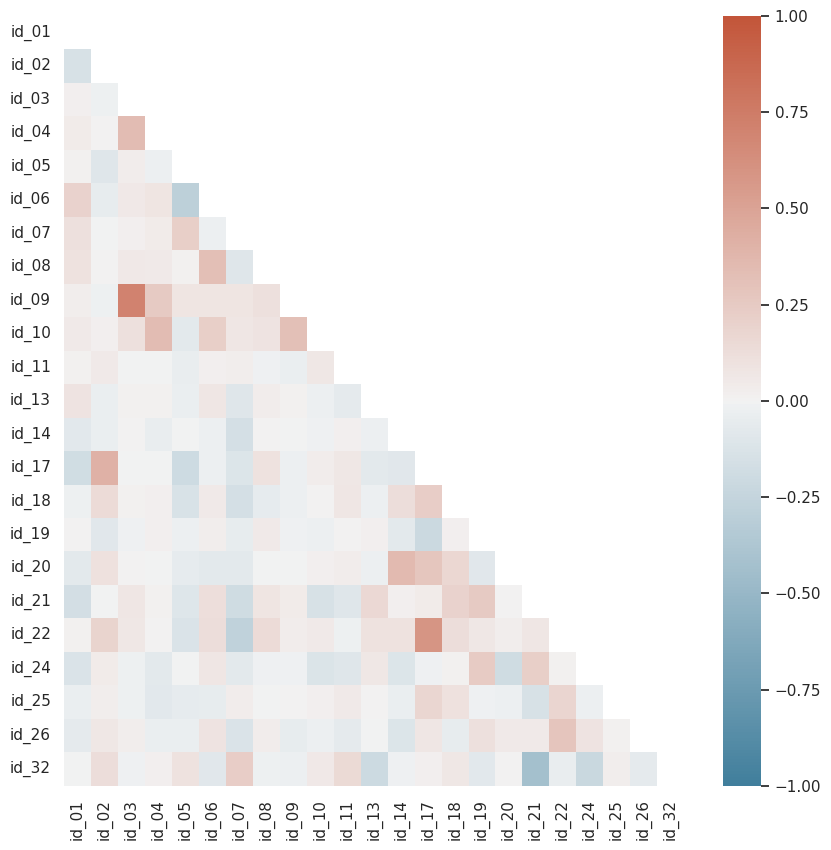

In [9]:
show_correlation(correlation=identities_correlation, vmin=-1, vmax=1)

In [10]:
identities_correlation

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
id_01,1.000000,-0.142064,0.019511,0.039660,0.009666,0.201637,0.114280,0.099587,0.029174,0.050737,...,-0.180504,-0.016626,0.000519,-0.071238,-0.167421,0.008241,-0.132626,-0.036954,-0.069874,-0.004386
id_02,-0.142064,1.000000,-0.020115,0.000605,-0.101547,-0.047041,-0.000758,0.005047,-0.020656,0.017490,...,0.412987,0.142657,-0.093068,0.108523,-0.006135,0.190991,0.039760,0.023763,0.069095,0.130711
id_03,0.019511,-0.020115,1.000000,0.342178,0.034280,0.056069,0.021234,0.056737,0.710782,0.112707,...,-0.000819,0.011856,-0.009559,0.003342,0.071872,0.068602,-0.022782,-0.018247,0.025608,-0.011526
id_04,0.039660,0.000605,0.342178,1.000000,-0.029264,0.081269,0.043020,0.051455,0.251470,0.337323,...,-0.005207,0.017300,0.017926,-0.006609,0.011153,0.000454,-0.073110,-0.084964,-0.035366,0.016467
id_05,0.009666,-0.101547,0.034280,-0.029264,1.000000,-0.291584,0.219281,0.008645,0.085882,-0.070985,...,-0.203021,-0.137848,-0.023800,-0.058070,-0.101900,-0.126581,-0.006584,-0.057463,-0.033602,0.099603
id_06,0.201637,-0.047041,0.056069,0.081269,-0.291584,1.000000,-0.028910,0.326691,0.079989,0.222372,...,-0.028708,0.048905,0.029647,-0.071015,0.118837,0.131131,0.075201,-0.052306,0.086724,-0.086302
id_07,0.114280,-0.000758,0.021234,0.043020,0.219281,-0.028910,1.000000,-0.094086,0.082746,0.071988,...,-0.114993,-0.161544,-0.050964,-0.074770,-0.188250,-0.277448,-0.070752,0.037649,-0.131638,0.227533
id_08,0.099587,0.005047,0.056737,0.051455,0.008645,0.326691,-0.094086,1.000000,0.112471,0.086326,...,0.096986,-0.061456,0.052736,-0.001837,0.085533,0.143301,-0.011849,-0.003628,0.037212,-0.020381
id_09,0.029174,-0.020656,0.710782,0.251470,0.085882,0.079989,0.082746,0.112471,1.000000,0.316010,...,-0.023937,-0.024126,-0.008878,-0.006150,0.043637,0.032230,-0.012312,0.003128,-0.054088,-0.029533
id_10,0.050737,0.017490,0.112707,0.337323,-0.070985,0.222372,0.071988,0.086326,0.316010,1.000000,...,0.038112,0.003472,-0.030461,0.018121,-0.141468,0.050443,-0.122490,0.022123,-0.025833,0.056037


### Higlhly correlated features

- id_03 - id_09
- id_17 - id_22

## Describe data

#### Null values as percentage of total

In [11]:
identities.select(pl.all().is_null().sum() / pl.all().count()).collect().transpose(include_header=True, column_names=["null_count"]).sort("null_count", descending=True)

column,null_count
str,f64
"""id_24""",29.384032
"""id_25""",27.104638
"""id_07""",26.979243
"""id_08""",26.979243
"""id_21""",26.95755
…,…
"""id_37""",0.023038
"""id_38""",0.023038
"""TransactionID""",0.0


In [12]:
identities.describe()

statistic,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,str,str,str,str,str,f64,str,str,str,str,str,str,str,str
"""count""",144233.0,144233.0,140872.0,66324.0,66324.0,136865.0,136865.0,5155.0,5155.0,74926.0,74926.0,140978.0,"""144233""",127320.0,80044.0,"""140985""","""129340""",139369.0,45113.0,139318.0,139261.0,5159.0,5169.0,"""5169""",4747.0,5132.0,5163.0,"""5169""","""140978""","""140978""","""77565""","""140282""",77586.0,"""73289""","""77805""","""140985""","""140985""","""140985""","""140985""","""140810""","""118666"""
"""null_count""",0.0,0.0,3361.0,77909.0,77909.0,7368.0,7368.0,139078.0,139078.0,69307.0,69307.0,3255.0,"""0""",16913.0,64189.0,"""3248""","""14893""",4864.0,99120.0,4915.0,4972.0,139074.0,139064.0,"""139064""",139486.0,139101.0,139070.0,"""139064""","""3255""","""3255""","""66668""","""3951""",66647.0,"""70944""","""66428""","""3248""","""3248""","""3248""","""3248""","""3423""","""25567"""
"""mean""",3.2363e6,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.69871,13.285354,-38.600388,0.091023,-0.301124,99.745325,null,48.053071,-344.507146,null,null,189.451377,14.237337,353.128174,403.882666,368.26982,16.002708,null,12.800927,329.608924,149.070308,null,null,null,null,null,26.508597,null,null,null,null,null,null,null,null
"""std""",178849.571186,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,2.789446,1.127602,null,11.774858,93.695502,null,null,30.37536,1.561302,141.095343,152.160327,198.847038,6.897665,null,2.372447,97.461089,32.101995,null,null,null,null,null,3.737502,null,null,null,null,null,null,null,null
"""min""",2.987004e6,-100.0,1.0,-13.0,-28.0,-72.0,-100.0,-46.0,-100.0,-36.0,-100.0,90.0,"""Found""",10.0,-660.0,"""Found""","""Found""",100.0,10.0,100.0,100.0,100.0,10.0,"""IP_PROXY:ANONY…",11.0,100.0,100.0,"""Found""","""Found""","""Found""","""Android""","""BLU/Dash""",0.0,"""0x0""","""match_status:-…","""F""","""F""","""F""","""F""","""desktop""","""0PAJ5"""
"""25%""",3.077142e6,-10.0,67992.0,0.0,0.0,0.0,-6.0,5.0,-48.0,0.0,0.0,100.0,null,49.0,-360.0,null,null,166.0,13.0,266.0,256.0,252.0,14.0,null,11.0,321.0,119.0,null,null,null,null,null,24.0,null,null,null,null,null,null,null,null
"""50%""",3.198818e6,-5.0,125803.0,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,0.0,100.0,null,52.0,-300.0,null,null,166.0,15.0,341.0,472.0,252.0,14.0,null,11.0,321.0,149.0,null,null,null,null,null,24.0,null,null,null,null,null,null,null,null
"""75%""",3.392923e6,-5.0,228748.0,0.0,0.0,1.0,0.0,22.0,-23.0,0.0,0.0,100.0,null,52.0,-300.0,null,null,225.0,15.0,427.0,533.0,487.0,14.0,null,15.0,371.0,169.0,null,null,null,null,null,32.0,null,null,null,null,null,null,null,null
"""max""",3.577534e6,0.0,999595.0,10.0,0.0,52.0,0.0,61.0,0.0,25.0,0.0,100.0,"""NotFound""",64.0,720.0,"""Unknown""","""NotFound""",229.0,29.0,671.0,661.0,854.0,44.0,"""IP_PROXY:TRANS…",26.0,548.0,216.0,"""NotFound""","""New""","""NotFound""","""other""","""waterfox""",32.0,"""976x600""","""match_status:2…","""T""","""T""","""T""","""T""","""mobile""","""xs-Z47b7VqTMxs…"


- For numerical columns, fill nulls with median

### Fill nulls numerical features

In [13]:
identities = identities.with_columns(
    *[pl.col(col).fill_null(pl.col(col).median()).shrink_dtype().alias(col) for col in identities.select(pl.col(pl.NUMERIC_DTYPES)).columns]
)

In [14]:
identities.describe()

statistic,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,str,str,str,str,str,f64,str,str,str,str,str,str,str,str
"""count""",144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,"""144233""",144233.0,144233.0,"""140985""","""129340""",144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,"""5169""",144233.0,144233.0,144233.0,"""5169""","""140978""","""140978""","""77565""","""140282""",144233.0,"""73289""","""77805""","""140985""","""140985""","""140985""","""140985""","""140810""","""118666"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,"""3248""","""14893""",0.0,0.0,0.0,0.0,0.0,0.0,"""139064""",0.0,0.0,0.0,"""139064""","""3255""","""3255""","""66668""","""3951""",0.0,"""70944""","""66428""","""3248""","""3248""","""3248""","""3248""","""3423""","""25567"""
"""mean""",3.2363e6,-10.170502,173576.71875,0.027677,-0.027102,1.533054,-6.356514,13.974458,-34.164421,0.047285,-0.156427,99.751076,null,48.515896,-324.699829,null,null,188.660522,14.761456,352.714874,406.230804,256.158813,14.071773,null,11.059272,321.306305,149.002518,null,null,null,null,null,25.349428,null,null,null,null,null,null,null,null
"""std""",178849.578125,14.347949,157953.171875,0.406775,0.476273,5.126361,16.131926,2.156095,5.004362,0.710557,2.016105,1.115447,null,11.135605,73.219879,null,null,30.157394,0.942053,138.687912,150.030243,43.362175,1.357703,null,0.537066,18.451414,6.073111,null,null,null,null,null,3.013032,null,null,null,null,null,null,null,null
"""min""",2.987004e6,-100.0,1.0,-13.0,-28.0,-72.0,-100.0,-46.0,-100.0,-36.0,-100.0,90.0,"""Found""",10.0,-660.0,"""Found""","""Found""",100.0,10.0,100.0,100.0,100.0,10.0,"""IP_PROXY:ANONY…",11.0,100.0,100.0,"""Found""","""Found""","""Found""","""Android""","""BLU/Dash""",0.0,"""0x0""","""match_status:-…","""F""","""F""","""F""","""F""","""desktop""","""0PAJ5"""
"""25%""",3.077142e6,-10.0,69271.0,0.0,0.0,0.0,-5.0,14.0,-34.0,0.0,0.0,100.0,null,49.0,-300.0,null,null,166.0,15.0,266.0,266.0,252.0,14.0,null,11.0,321.0,149.0,null,null,null,null,null,24.0,null,null,null,null,null,null,null,null
"""50%""",3.198818e6,-5.0,125800.5,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,0.0,100.0,null,52.0,-300.0,null,null,166.0,15.0,341.0,472.0,252.0,14.0,null,11.0,321.0,149.0,null,null,null,null,null,24.0,null,null,null,null,null,null,null,null
"""75%""",3.392923e6,-5.0,225093.0,0.0,0.0,1.0,0.0,14.0,-34.0,0.0,0.0,100.0,null,52.0,-300.0,null,null,225.0,15.0,427.0,533.0,252.0,14.0,null,11.0,321.0,149.0,null,null,null,null,null,24.0,null,null,null,null,null,null,null,null
"""max""",3.577534e6,0.0,999595.0,10.0,0.0,52.0,0.0,61.0,0.0,25.0,0.0,100.0,"""NotFound""",64.0,720.0,"""Unknown""","""NotFound""",229.0,29.0,671.0,661.0,854.0,44.0,"""IP_PROXY:TRANS…",26.0,548.0,216.0,"""NotFound""","""New""","""NotFound""","""other""","""waterfox""",32.0,"""976x600""","""match_status:2…","""T""","""T""","""T""","""T""","""mobile""","""xs-Z47b7VqTMxs…"


/home/paolo/git/fraud-detection/venv/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


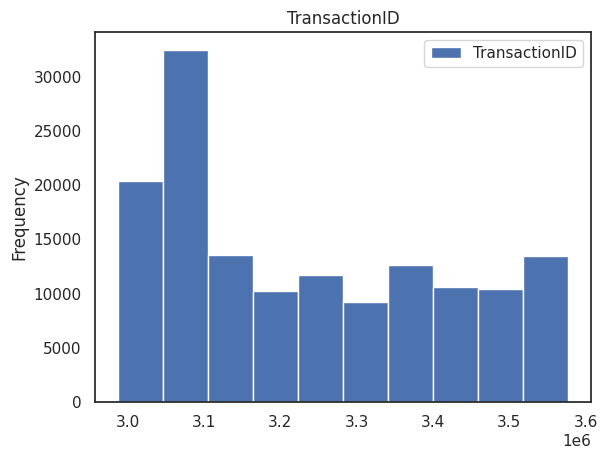

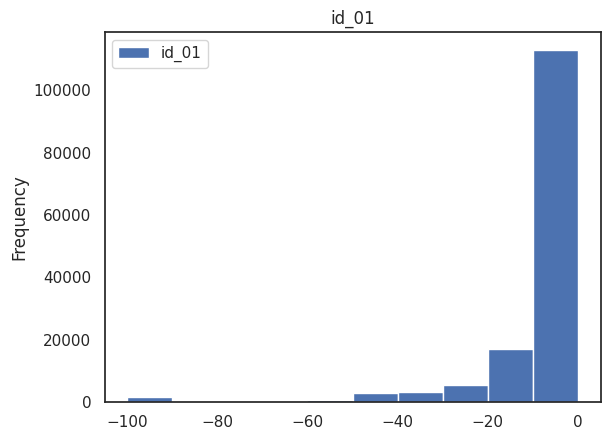

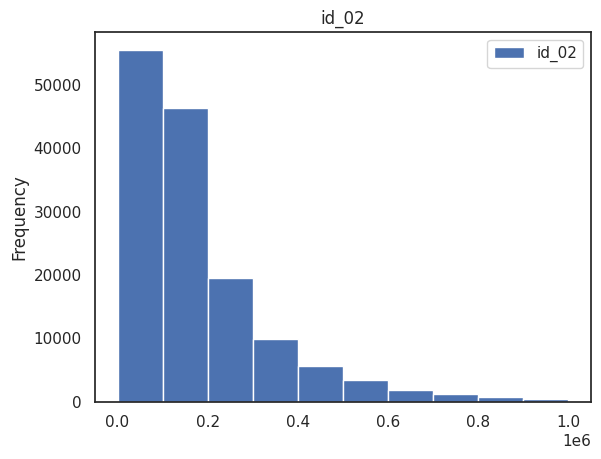

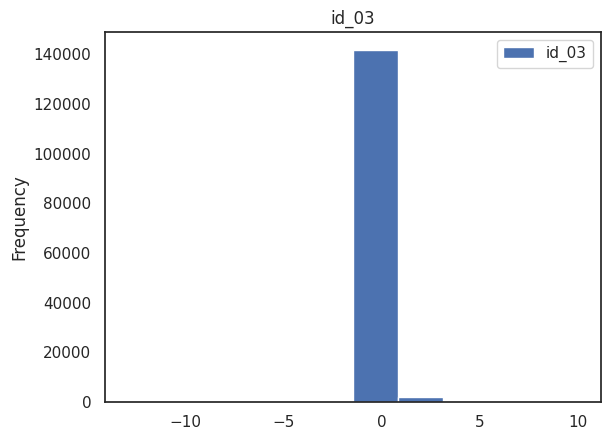

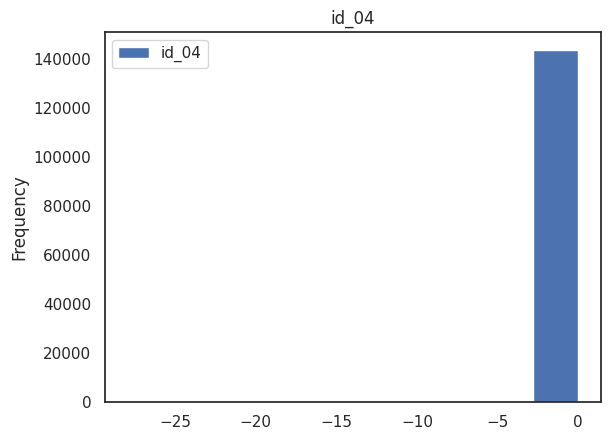

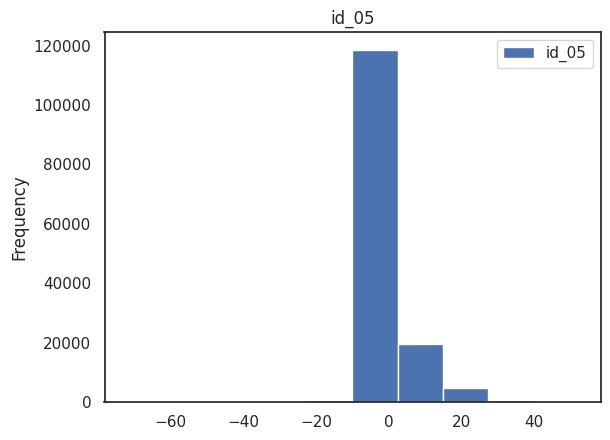

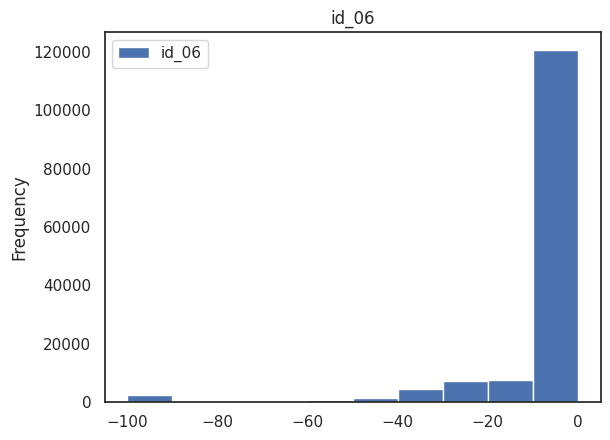

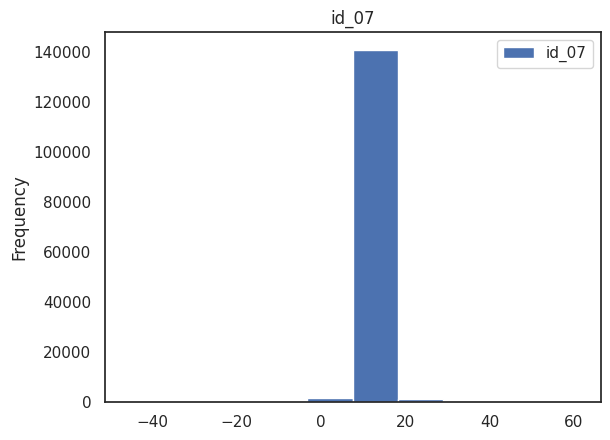

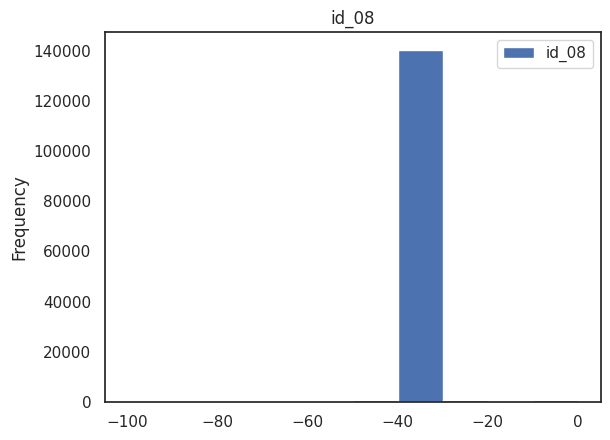

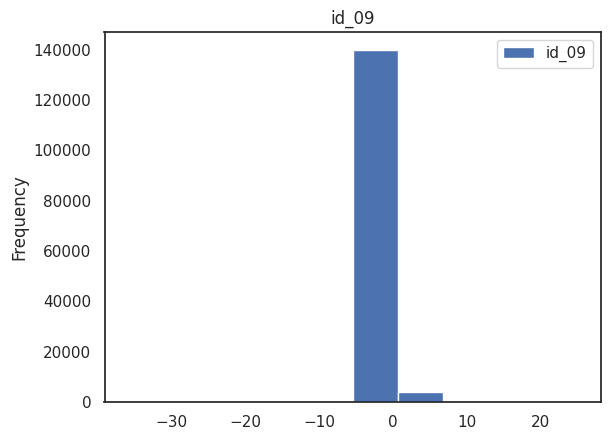

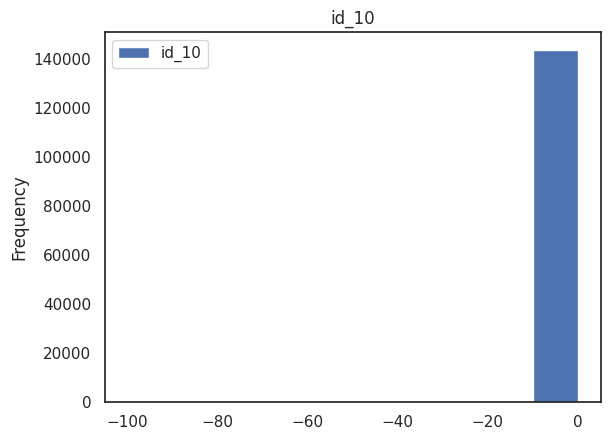

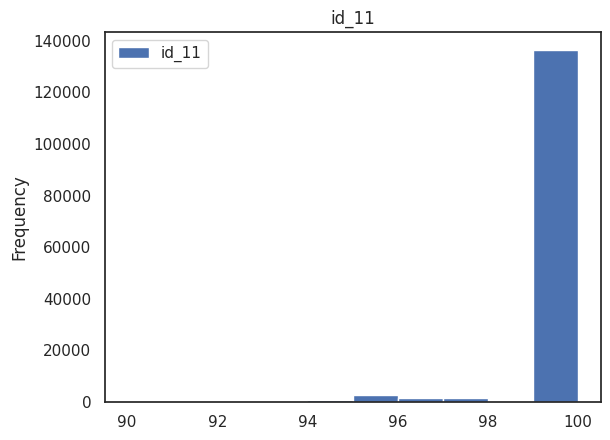

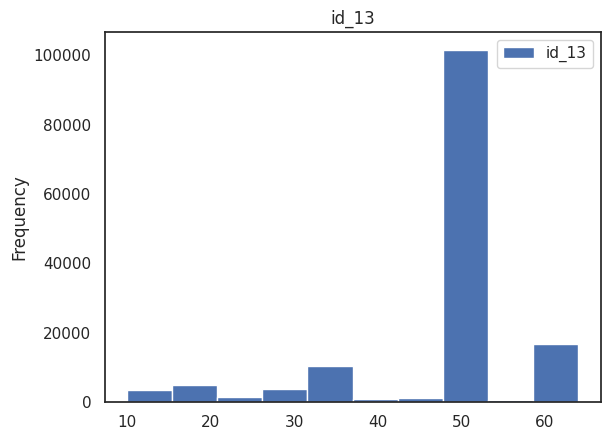

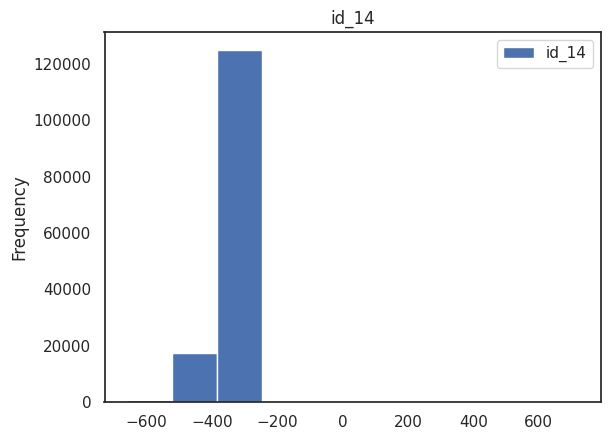

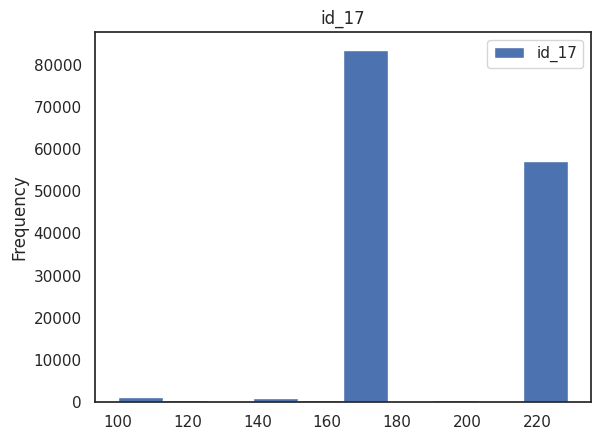

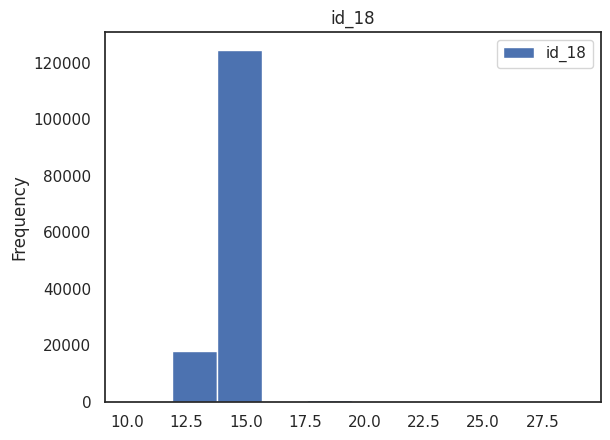

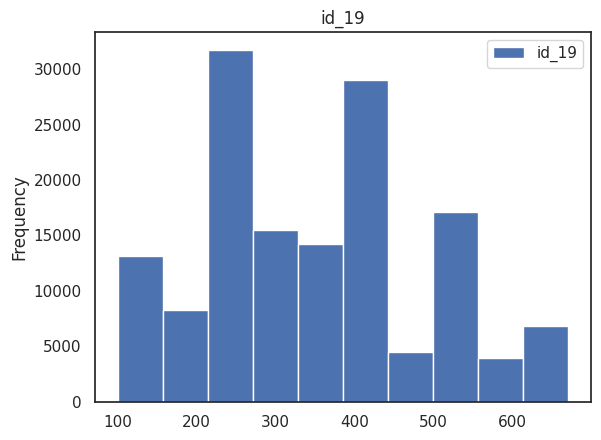

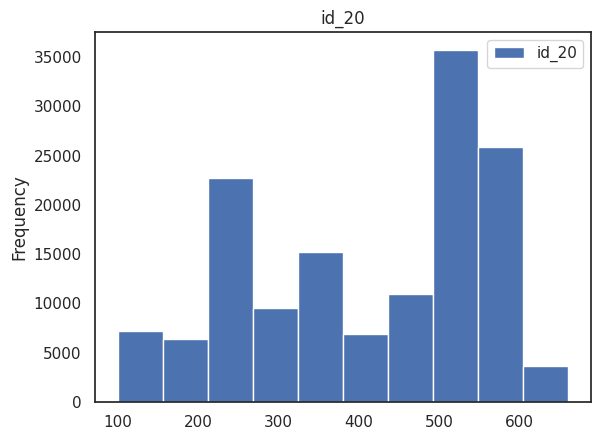

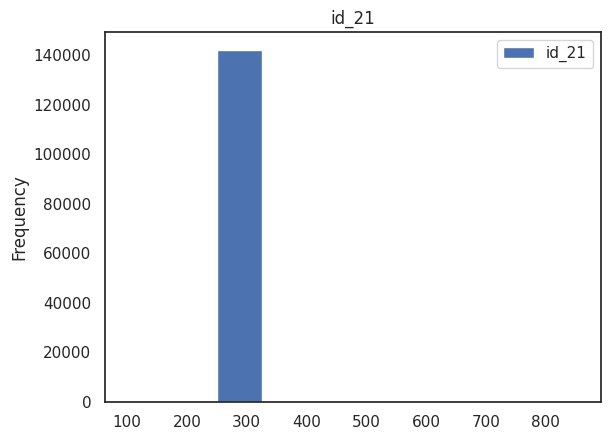

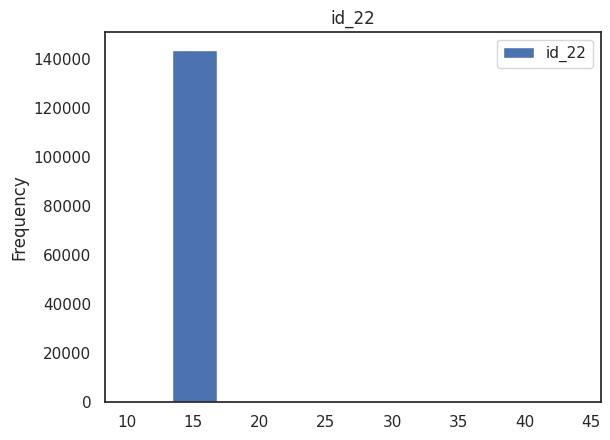

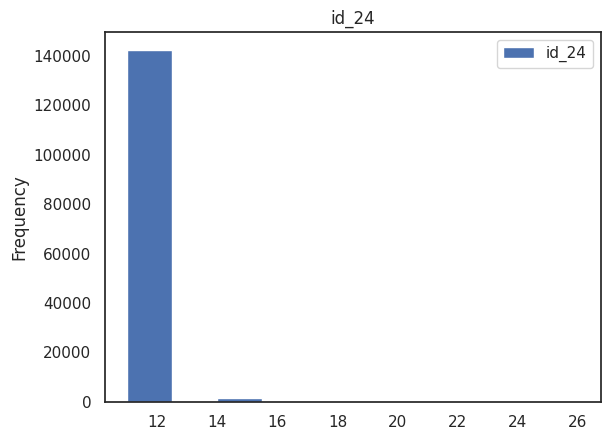

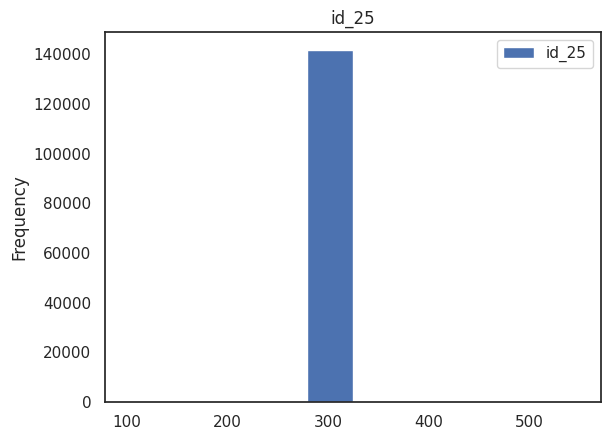

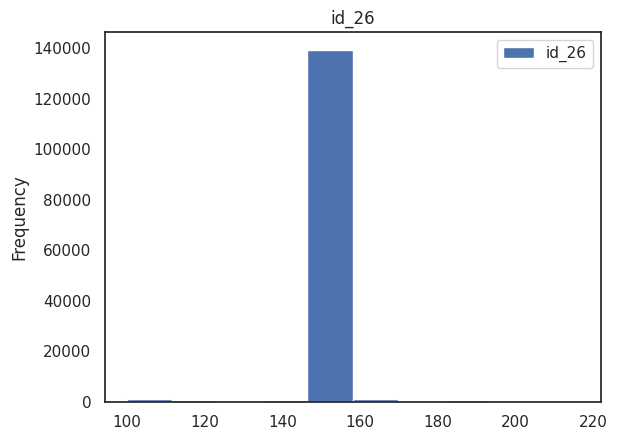

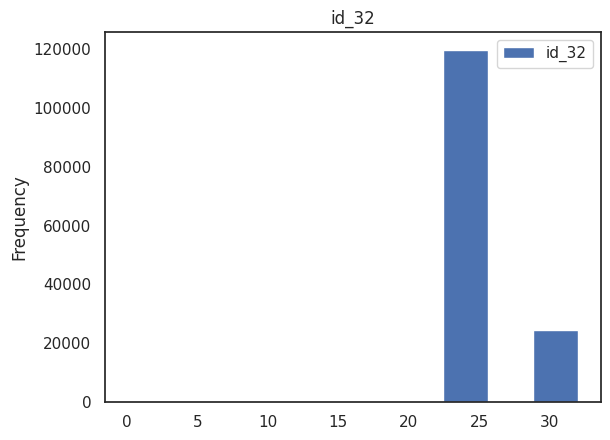

In [15]:
for col in identities.select(pl.col(pl.NUMERIC_DTYPES)).columns:
    identities.select(col).collect().to_pandas().plot(kind="hist", title=col)

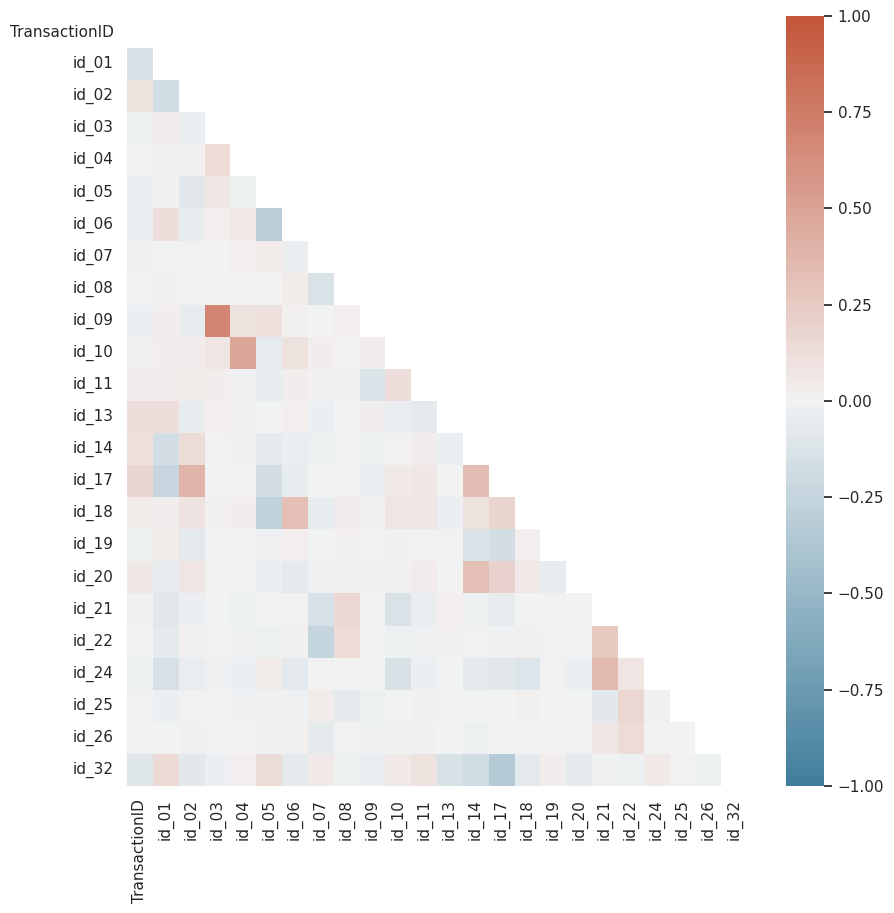

In [16]:
show_correlation(identities.select(pl.col(pl.NUMERIC_DTYPES)).collect().to_pandas().corr(method="kendall"))

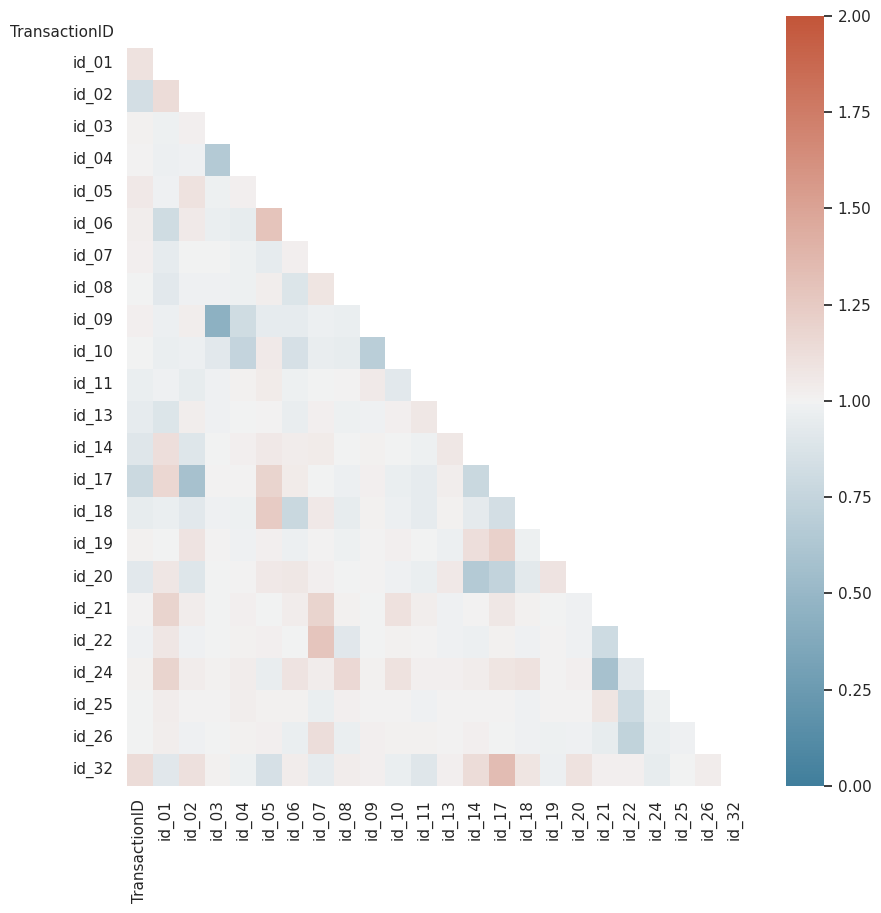

In [17]:
import scipy
show_correlation(identities.select(pl.col(pl.NUMERIC_DTYPES)).collect().to_pandas().corr(method=scipy.spatial.distance.correlation), vmin=0, vmax=2)

### Null values categorical features

In [18]:
def fill_nulls_categorical_columns(dataframe: pl.LazyFrame) -> pl.LazyFrame:
    unknown_columns: list[str] = ["DeviceInfo", "DeviceType", "id_15", "id_28", "id_30", "id_31", "id_35", "id_36", "id_37", "id_38"]
    mode_columns: list[str] = ["id_33"]
    not_found_columns: list[str] = ["id_12", "id_16", "id_27", "id_29"]
    
    return dataframe.with_columns(
        pl.col("id_23").fill_null("ip_proxy:hidden").str.to_lowercase().alias("id_23"),
        pl.col("id_34").fill_null("match_status:-1").str.to_lowercase().alias("id_34"),
        *[pl.col(col).fill_null("unknown").str.to_lowercase().alias(col) for col in unknown_columns],
        *[pl.col(col).fill_null(pl.col(col).mode().str.to_lowercase().alias(col)) for col in mode_columns],
        *[pl.col(col).fill_null("not_found").str.to_lowercase().alias(col) for col in not_found_columns],
    )

In [19]:
categorical_features: pl.LazyFrame = identities.select(pl.col(pl.String))
categorical_features = categorical_features.with_columns(pl.all().str.to_lowercase())
categorical_features.select(pl.all().is_null().sum() / pl.all().count()).collect().transpose(include_header=True, column_names=["null_count"]).sort("null_count", descending=True).to_series().to_list()

['id_23',
 'id_27',
 'id_33',
 'id_30',
 'id_34',
 'DeviceInfo',
 'id_16',
 'id_31',
 'DeviceType',
 'id_28',
 'id_29',
 'id_15',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'id_12']

### Analyze columns one by one

#### ID_23

In [20]:
categorical_features.select("id_23").collect().to_series().value_counts()

id_23,count
str,u32
"""ip_proxy:anony…",1071
"""ip_proxy:trans…",3489
null,139064
"""ip_proxy:hidde…",609


#### id_27

In [21]:
categorical_features.select("id_27").collect().to_series().value_counts()

id_27,count
str,u32
"""found""",5155
null,139064
"""notfound""",14


#### id_33

In [22]:
categorical_features.select("id_33").collect().to_series().value_counts(sort=True)

id_33,count
str,u32
null,70944
"""1920x1080""",16874
"""1366x768""",8605
"""1334x750""",6447
"""2208x1242""",4900
…,…
"""2160x1081""",1
"""1920x1279""",1
"""1596x710""",1


#### id_30

In [23]:
categorical_features.select("id_30").collect().to_series().value_counts(sort=True)

id_30,count
str,u32
null,66668
"""windows 10""",21155
"""windows 7""",13110
"""ios 11.2.1""",3722
"""ios 11.1.2""",3699
…,…
"""func""",10
"""ios 11.4.0""",5
"""mac os x 10_13…",4


#### id_34

In [24]:
categorical_features.select("id_34").collect().to_series().value_counts(sort=True)

id_34,count
str,u32
null,66428
"""match_status:2…",60011
"""match_status:1…",17376
"""match_status:0…",415
"""match_status:-…",3


#### DeviceInfo

In [25]:
categorical_features.select("DeviceInfo").collect().to_series().value_counts(sort=True)

DeviceInfo,count
str,u32
"""windows""",47722
null,25567
"""ios device""",19782
"""macos""",12573
"""trident/7.0""",7440
…,…
"""g8142""",1
"""g630-u251""",1
"""lg-k212""",1


In [26]:
sorted(categorical_features.select(pl.col("DeviceInfo").str.replace_all(pattern="build/.*", value="")).unique().drop_nulls().collect().to_series().to_list())

['',
 '0paj5',
 '0pja2',
 '0pm92',
 '1016s',
 '2pq93',
 '2ps64 ',
 '2pyb2',
 '2pzc5',
 '4003a',
 '4009f',
 '4013m ',
 '4027a ',
 '4034e',
 '4034g',
 '4047a ',
 '4047g ',
 '47418',
 '5010g ',
 '5010s ',
 '5011a ',
 '5012g ',
 '5015a ',
 '5017a',
 '5025g ',
 '5042a',
 '5044a',
 '5045i',
 '5049w ',
 '5051a ',
 '5054n',
 '5054s ',
 '5056a ',
 '5056n',
 '5057m',
 '5080a ',
 '5085b ',
 '5095i ',
 '6037b',
 '6039a ',
 '6045i ',
 '6055b',
 '7048a ',
 '7055a ',
 '7_plus',
 '8050g ',
 '8062 ',
 '8080 ',
 '831c',
 '9002a',
 '9003a ',
 '9008a ',
 '9022x',
 '916',
 '9203a ',
 'a0001',
 'a0001 ',
 'a1-850',
 'a1601 ',
 'a3-a20',
 'a37f',
 'a3_mini',
 'a463bg',
 'a466bg',
 'a5002',
 'a50c+',
 'a574bl ',
 'a577vl',
 'a621r',
 'a9',
 'a952',
 'a96 ',
 'a97',
 'advance',
 'aerial',
 'aerial ',
 'akus',
 'alcatel',
 'alcatel one touch 5036a ',
 'alcatel one touch 7040a ',
 'alcatel one touch 7042a ',
 'alcatel one touch 7047a ',
 'alcatel_4060a',
 'alcatel_4060o ',
 'alcatel_5044r ',
 'alcatel_5054o',
 '

#### id_16

In [27]:
categorical_features.select("id_16").collect().to_series().value_counts(sort=True)

id_16,count
str,u32
"""found""",66324
"""notfound""",63016
null,14893


#### id_31

In [28]:
categorical_features.select("id_31").collect().to_series().value_counts(sort=True)

id_31,count
str,u32
"""chrome 63.0""",22000
"""mobile safari …",13423
"""mobile safari …",11474
"""ie 11.0 for de…",9030
"""safari generic…",8195
…,…
"""cherry""",1
"""android""",1
"""firefox mobile…",1


#### DeviceType

In [29]:
categorical_features.select("DeviceType").collect().to_series().value_counts(sort=True)

DeviceType,count
str,u32
"""desktop""",85165
"""mobile""",55645
null,3423


#### id_28

In [30]:
categorical_features.select("id_28").collect().to_series().value_counts(sort=True)

id_28,count
str,u32
"""found""",76232
"""new""",64746
null,3255


#### id_29

In [31]:
categorical_features.select("id_29").collect().to_series().value_counts(sort=True)

id_29,count
str,u32
"""found""",74926
"""notfound""",66052
null,3255


15

In [32]:
categorical_features.select("id_15").collect().to_series().value_counts(sort=True)

id_15,count
str,u32
"""found""",67728
"""new""",61612
"""unknown""",11645
null,3248


35

In [33]:
categorical_features.select("id_35").collect().to_series().value_counts(sort=True)

id_35,count
str,u32
"""t""",77814
"""f""",63171
null,3248


36

In [34]:
categorical_features.select("id_36").collect().to_series().value_counts(sort=True)

id_36,count
str,u32
"""f""",134066
"""t""",6919
null,3248


37

In [35]:
categorical_features.select("id_37").collect().to_series().value_counts(sort=True)

id_37,count
str,u32
"""t""",110452
"""f""",30533
null,3248


38

In [36]:
categorical_features.select("id_38").collect().to_series().value_counts(sort=True)

id_38,count
str,u32
"""f""",73922
"""t""",67063
null,3248


12

In [37]:
categorical_features.select("id_12").collect().to_series().value_counts(sort=True)

id_12,count
str,u32
"""notfound""",123025
"""found""",21208


In [38]:
identities = fill_nulls_categorical_columns(identities)
identities.describe()

statistic,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,str,str,str,str,str,f64,str,str,str,str,str,str,str,str
"""count""",144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,"""144233""",144233.0,144233.0,"""144233""","""144233""",144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,"""144233""",144233.0,144233.0,144233.0,"""144233""","""144233""","""144233""","""144233""","""144233""",144233.0,"""73289""","""144233""","""144233""","""144233""","""144233""","""144233""","""144233""","""144233"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""70944""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",3.2363e6,-10.170502,173576.71875,0.027677,-0.027102,1.533054,-6.356514,13.974458,-34.164421,0.047285,-0.156427,99.751076,null,48.515896,-324.699829,null,null,188.660522,14.761456,352.714874,406.230804,256.158813,14.071773,null,11.059272,321.306305,149.002518,null,null,null,null,null,25.349428,null,null,null,null,null,null,null,null
"""std""",178849.578125,14.347949,157953.171875,0.406775,0.476273,5.126361,16.131926,2.156095,5.004362,0.710557,2.016105,1.115447,null,11.135605,73.219879,null,null,30.157394,0.942053,138.687912,150.030243,43.362175,1.357703,null,0.537066,18.451414,6.073111,null,null,null,null,null,3.013032,null,null,null,null,null,null,null,null
"""min""",2.987004e6,-100.0,1.0,-13.0,-28.0,-72.0,-100.0,-46.0,-100.0,-36.0,-100.0,90.0,"""found""",10.0,-660.0,"""found""","""found""",100.0,10.0,100.0,100.0,100.0,10.0,"""ip_proxy:anony…",11.0,100.0,100.0,"""found""","""found""","""found""","""android""","""android""",0.0,"""0x0""","""match_status:-…","""f""","""f""","""f""","""f""","""desktop""","""0paj5"""
"""25%""",3.077142e6,-10.0,69271.0,0.0,0.0,0.0,-5.0,14.0,-34.0,0.0,0.0,100.0,null,49.0,-300.0,null,null,166.0,15.0,266.0,266.0,252.0,14.0,null,11.0,321.0,149.0,null,null,null,null,null,24.0,null,null,null,null,null,null,null,null
"""50%""",3.198818e6,-5.0,125800.5,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,0.0,100.0,null,52.0,-300.0,null,null,166.0,15.0,341.0,472.0,252.0,14.0,null,11.0,321.0,149.0,null,null,null,null,null,24.0,null,null,null,null,null,null,null,null
"""75%""",3.392923e6,-5.0,225093.0,0.0,0.0,1.0,0.0,14.0,-34.0,0.0,0.0,100.0,null,52.0,-300.0,null,null,225.0,15.0,427.0,533.0,252.0,14.0,null,11.0,321.0,149.0,null,null,null,null,null,24.0,null,null,null,null,null,null,null,null
"""max""",3.577534e6,0.0,999595.0,10.0,0.0,52.0,0.0,61.0,0.0,25.0,0.0,100.0,"""notfound""",64.0,720.0,"""unknown""","""notfound""",229.0,29.0,671.0,661.0,854.0,44.0,"""ip_proxy:trans…",26.0,548.0,216.0,"""notfound""","""unknown""","""notfound""","""windows xp""","""zte/blade""",32.0,"""976x600""","""match_status:2…","""unknown""","""unknown""","""unknown""","""unknown""","""unknown""","""zuum_zen_i bui…"


### Preprocess columns with strings
- id_31
- device_info
- id_30
- id_33

#### ID_30

In [39]:
identities = identities.with_columns(
    pl.col("id_30").str.to_lowercase().str.extract(pattern="(^[^\\d]+(\\d+))").fill_null("unknown").alias("id_30")
)

identities.describe()

statistic,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,str,str,str,str,str,f64,str,str,str,str,str,str,str,str
"""count""",144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,"""144233""",144233.0,144233.0,"""144233""","""144233""",144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,"""144233""",144233.0,144233.0,144233.0,"""144233""","""144233""","""144233""","""144233""","""144233""",144233.0,"""73289""","""144233""","""144233""","""144233""","""144233""","""144233""","""144233""","""144233"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""70944""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",3.2363e6,-10.170502,173576.71875,0.027677,-0.027102,1.533054,-6.356514,13.974458,-34.164421,0.047285,-0.156427,99.751076,null,48.515896,-324.699829,null,null,188.660522,14.761456,352.714874,406.230804,256.158813,14.071773,null,11.059272,321.306305,149.002518,null,null,null,null,null,25.349428,null,null,null,null,null,null,null,null
"""std""",178849.578125,14.347949,157953.171875,0.406775,0.476273,5.126361,16.131926,2.156095,5.004362,0.710557,2.016105,1.115447,null,11.135605,73.219879,null,null,30.157394,0.942053,138.687912,150.030243,43.362175,1.357703,null,0.537066,18.451414,6.073111,null,null,null,null,null,3.013032,null,null,null,null,null,null,null,null
"""min""",2.987004e6,-100.0,1.0,-13.0,-28.0,-72.0,-100.0,-46.0,-100.0,-36.0,-100.0,90.0,"""found""",10.0,-660.0,"""found""","""found""",100.0,10.0,100.0,100.0,100.0,10.0,"""ip_proxy:anony…",11.0,100.0,100.0,"""found""","""found""","""found""","""android 4""","""android""",0.0,"""0x0""","""match_status:-…","""f""","""f""","""f""","""f""","""desktop""","""0paj5"""
"""25%""",3.077142e6,-10.0,69271.0,0.0,0.0,0.0,-5.0,14.0,-34.0,0.0,0.0,100.0,null,49.0,-300.0,null,null,166.0,15.0,266.0,266.0,252.0,14.0,null,11.0,321.0,149.0,null,null,null,null,null,24.0,null,null,null,null,null,null,null,null
"""50%""",3.198818e6,-5.0,125800.5,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,0.0,100.0,null,52.0,-300.0,null,null,166.0,15.0,341.0,472.0,252.0,14.0,null,11.0,321.0,149.0,null,null,null,null,null,24.0,null,null,null,null,null,null,null,null
"""75%""",3.392923e6,-5.0,225093.0,0.0,0.0,1.0,0.0,14.0,-34.0,0.0,0.0,100.0,null,52.0,-300.0,null,null,225.0,15.0,427.0,533.0,252.0,14.0,null,11.0,321.0,149.0,null,null,null,null,null,24.0,null,null,null,null,null,null,null,null
"""max""",3.577534e6,0.0,999595.0,10.0,0.0,52.0,0.0,61.0,0.0,25.0,0.0,100.0,"""notfound""",64.0,720.0,"""unknown""","""notfound""",229.0,29.0,671.0,661.0,854.0,44.0,"""ip_proxy:trans…",26.0,548.0,216.0,"""notfound""","""unknown""","""notfound""","""windows 8""","""zte/blade""",32.0,"""976x600""","""match_status:2…","""unknown""","""unknown""","""unknown""","""unknown""","""unknown""","""zuum_zen_i bui…"


#### id_31

In [40]:
sorted(identities.select("id_31").unique().collect().to_series().to_list())

['android',
 'android browser 4.0',
 'android webview 4.0',
 'aol',
 'blu/dash',
 'cherry',
 'chrome',
 'chrome 43.0 for android',
 'chrome 46.0 for android',
 'chrome 49.0',
 'chrome 49.0 for android',
 'chrome 50.0 for android',
 'chrome 51.0',
 'chrome 51.0 for android',
 'chrome 52.0 for android',
 'chrome 53.0 for android',
 'chrome 54.0 for android',
 'chrome 55.0',
 'chrome 55.0 for android',
 'chrome 56.0',
 'chrome 56.0 for android',
 'chrome 57.0',
 'chrome 57.0 for android',
 'chrome 58.0',
 'chrome 58.0 for android',
 'chrome 59.0',
 'chrome 59.0 for android',
 'chrome 60.0',
 'chrome 60.0 for android',
 'chrome 61.0',
 'chrome 61.0 for android',
 'chrome 62.0',
 'chrome 62.0 for android',
 'chrome 62.0 for ios',
 'chrome 63.0',
 'chrome 63.0 for android',
 'chrome 63.0 for ios',
 'chrome 64.0',
 'chrome 64.0 for android',
 'chrome 64.0 for ios',
 'chrome 65.0',
 'chrome 65.0 for android',
 'chrome 65.0 for ios',
 'chrome 66.0',
 'chrome 66.0 for android',
 'chrome 66.0 for

In [41]:
identities = identities.with_columns(
    pl.when(
        pl.col("id_31").str.contains("/", literal=True)
    )
    .then(pl.lit("unknown"))
    .otherwise(pl.col("id_31").str.to_lowercase().str.extract(pattern="(^[^\\d]+)")).str.replace_all(pattern="generic", value="").str.replace_all("for android", "").str.strip_chars()
    .alias("id_31")
)

identities.describe()

statistic,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,str,str,str,str,str,f64,str,str,str,str,str,str,str,str
"""count""",144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,"""144233""",144233.0,144233.0,"""144233""","""144233""",144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,"""144233""",144233.0,144233.0,144233.0,"""144233""","""144233""","""144233""","""144233""","""144233""",144233.0,"""73289""","""144233""","""144233""","""144233""","""144233""","""144233""","""144233""","""144233"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""70944""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",3.2363e6,-10.170502,173576.71875,0.027677,-0.027102,1.533054,-6.356514,13.974458,-34.164421,0.047285,-0.156427,99.751076,null,48.515896,-324.699829,null,null,188.660522,14.761456,352.714874,406.230804,256.158813,14.071773,null,11.059272,321.306305,149.002518,null,null,null,null,null,25.349428,null,null,null,null,null,null,null,null
"""std""",178849.578125,14.347949,157953.171875,0.406775,0.476273,5.126361,16.131926,2.156095,5.004362,0.710557,2.016105,1.115447,null,11.135605,73.219879,null,null,30.157394,0.942053,138.687912,150.030243,43.362175,1.357703,null,0.537066,18.451414,6.073111,null,null,null,null,null,3.013032,null,null,null,null,null,null,null,null
"""min""",2.987004e6,-100.0,1.0,-13.0,-28.0,-72.0,-100.0,-46.0,-100.0,-36.0,-100.0,90.0,"""found""",10.0,-660.0,"""found""","""found""",100.0,10.0,100.0,100.0,100.0,10.0,"""ip_proxy:anony…",11.0,100.0,100.0,"""found""","""found""","""found""","""android 4""","""android""",0.0,"""0x0""","""match_status:-…","""f""","""f""","""f""","""f""","""desktop""","""0paj5"""
"""25%""",3.077142e6,-10.0,69271.0,0.0,0.0,0.0,-5.0,14.0,-34.0,0.0,0.0,100.0,null,49.0,-300.0,null,null,166.0,15.0,266.0,266.0,252.0,14.0,null,11.0,321.0,149.0,null,null,null,null,null,24.0,null,null,null,null,null,null,null,null
"""50%""",3.198818e6,-5.0,125800.5,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,0.0,100.0,null,52.0,-300.0,null,null,166.0,15.0,341.0,472.0,252.0,14.0,null,11.0,321.0,149.0,null,null,null,null,null,24.0,null,null,null,null,null,null,null,null
"""75%""",3.392923e6,-5.0,225093.0,0.0,0.0,1.0,0.0,14.0,-34.0,0.0,0.0,100.0,null,52.0,-300.0,null,null,225.0,15.0,427.0,533.0,252.0,14.0,null,11.0,321.0,149.0,null,null,null,null,null,24.0,null,null,null,null,null,null,null,null
"""max""",3.577534e6,0.0,999595.0,10.0,0.0,52.0,0.0,61.0,0.0,25.0,0.0,100.0,"""notfound""",64.0,720.0,"""unknown""","""notfound""",229.0,29.0,671.0,661.0,854.0,44.0,"""ip_proxy:trans…",26.0,548.0,216.0,"""notfound""","""unknown""","""notfound""","""windows 8""","""waterfox""",32.0,"""976x600""","""match_status:2…","""unknown""","""unknown""","""unknown""","""unknown""","""unknown""","""zuum_zen_i bui…"


#### Device info
Drop this column

In [42]:
# sorted(identities.select(pl.col("DeviceInfo").str.replace_all(pattern="Build/.*", value="").str.strip_chars()).unique().collect().to_series().to_list())

In [43]:
identities = identities.drop(["DeviceInfo"])

### Id 33

In [44]:
identities = identities.with_columns(
    pl.col("id_33").fill_null("-1x-1").str.split("x").list.eval(pl.element().cast(pl.Int32, strict=False)).list.to_struct(fields=["width", "height"]).alias("id_33")
).unnest(columns=["id_33"])

In [45]:
set(identities.collect().columns).difference(identities.columns)

{'height', 'width'}

In [46]:
if not IDENTITY_OUTPUT_PATH.exists():
    identities: pl.DataFrame = identities.collect()
    if "width" in identities.columns and "height" in identities.columns:
        identities.write_parquet(IDENTITY_OUTPUT_PATH)
    else:
        print(f"Width and height not present")
else:
    print("NOT WRITING TO DISK. FILE ALREADY EXISTS")

NOT WRITING TO DISK. FILE ALREADY EXISTS


In [47]:
if IDENTITY_OUTPUT_PATH.exists():
    identities_loaded = pl.scan_parquet(IDENTITY_OUTPUT_PATH)

identities_loaded.describe()

statistic,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,width,height,id_34,id_35,id_36,id_37,id_38,DeviceType
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,str,str,str,str,str,f64,f64,f64,str,str,str,str,str,str
"""count""",144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,"""144233""",144233.0,144233.0,"""144233""","""144233""",144233.0,144233.0,144233.0,144233.0,144233.0,144233.0,"""144233""",144233.0,144233.0,144233.0,"""144233""","""144233""","""144233""","""144233""","""144233""",144233.0,144233.0,144233.0,"""144233""","""144233""","""144233""","""144233""","""144233""","""144233"""
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",3.2363e6,-10.170502,173576.71875,0.027677,-0.027102,1.533054,-6.356514,13.974458,-34.164421,0.047285,-0.156427,99.751076,null,48.515896,-324.699829,null,null,188.660522,14.761456,352.714874,406.230804,256.158813,14.071773,null,11.059272,321.306305,149.002518,null,null,null,null,null,25.349428,924.510604,544.470059,null,null,null,null,null,null
"""std""",178849.578125,14.347949,157953.171875,0.406775,0.476273,5.126361,16.131926,2.156095,5.004362,0.710557,2.016105,1.115447,null,11.135605,73.219879,null,null,30.157394,0.942053,138.687912,150.030243,43.362175,1.357703,null,0.537066,18.451414,6.073111,null,null,null,null,null,3.013032,995.333212,590.135563,null,null,null,null,null,null
"""min""",2.987004e6,-100.0,1.0,-13.0,-28.0,-72.0,-100.0,-46.0,-100.0,-36.0,-100.0,90.0,"""found""",10.0,-660.0,"""found""","""found""",100.0,10.0,100.0,100.0,100.0,10.0,"""ip_proxy:anony…",11.0,100.0,100.0,"""found""","""found""","""found""","""android 4""","""android""",0.0,-1.0,-1.0,"""match_status:-…","""f""","""f""","""f""","""f""","""desktop"""
"""25%""",3.077142e6,-10.0,69271.0,0.0,0.0,0.0,-5.0,14.0,-34.0,0.0,0.0,100.0,null,49.0,-300.0,null,null,166.0,15.0,266.0,266.0,252.0,14.0,null,11.0,321.0,149.0,null,null,null,null,null,24.0,-1.0,-1.0,null,null,null,null,null,null
"""50%""",3.198818e6,-5.0,125800.5,0.0,0.0,0.0,0.0,14.0,-34.0,0.0,0.0,100.0,null,52.0,-300.0,null,null,166.0,15.0,341.0,472.0,252.0,14.0,null,11.0,321.0,149.0,null,null,null,null,null,24.0,1024.0,640.0,null,null,null,null,null,null
"""75%""",3.392923e6,-5.0,225093.0,0.0,0.0,1.0,0.0,14.0,-34.0,0.0,0.0,100.0,null,52.0,-300.0,null,null,225.0,15.0,427.0,533.0,252.0,14.0,null,11.0,321.0,149.0,null,null,null,null,null,24.0,1920.0,1080.0,null,null,null,null,null,null
"""max""",3.577534e6,0.0,999595.0,10.0,0.0,52.0,0.0,61.0,0.0,25.0,0.0,100.0,"""notfound""",64.0,720.0,"""unknown""","""notfound""",229.0,29.0,671.0,661.0,854.0,44.0,"""ip_proxy:trans…",26.0,548.0,216.0,"""notfound""","""unknown""","""notfound""","""windows 8""","""waterfox""",32.0,7500.0,5000.0,"""match_status:2…","""unknown""","""unknown""","""unknown""","""unknown""","""unknown"""
